<a href="https://colab.research.google.com/github/AhmedImtiazKhan/AhmedImtiazKhan.github.io/blob/master/ClassificationProjectDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Demo_Data/Notebooks/
!pwd
!ls

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Demo_Data/Notebooks/'
/content
/content
drive  sample_data


In [ ]:
!unrar x "/content/drive/MyDrive/Classification/Project_Data.rar" -d "/content/dataset/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Classification/Project_Data.rar

Creating    /content/dataset                                          OK
Creating    /content/dataset/For Project                              OK
Creating    /content/dataset/For Project/Classification               OK
Creating    /content/dataset/For Project/Classification/Training      OK
Creating    /content/dataset/For Project/Classification/Training/1. ATELECTASIS  OK
Extracting  /content/dataset/For Project/Classification/Training/1. ATELECTASIS/id_00c17ded-70f9d85e-1d1e9329-ffcd74a2-fdf802be_Study_47978244.48435686.21317030.03499961.45571941_Series_88875657.82551783.33020737.08081710.78486391_image-95405448-26419303-92637870-150.jpg       0%  OK 
Extracting  /content/dataset/For Project/Classification/Training/1. ATELECTASIS/id_00c2a5d7-4def5825-ffb822da-68f4d96c-0229e88d_Study_16537724.39215147.00856566.91694423.43055338_Series_73

In [ ]:
!pip install ipyplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math
import ipyplot
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2



In [ ]:
training_file_path = '/content/drive/MyDrive/PROJECTDIP/Classification/classification_images_train.npy'
training_labels_path = '/content/drive/MyDrive/PROJECTDIP/Classification/Copy of classification_new_masks_train.npy'
testing_file_path = '/content/drive/MyDrive/PROJECTDIP/Classification/classification_images_test.npy'
testing_labels_path = '/content/drive/MyDrive/PROJECTDIP/Classification/Copy of classification_new_masks_test.npy'

training_images, training_labels, testing_images, testing_labels = np.load(training_file_path), np.load(training_labels_path), np.load(testing_file_path), np.load(testing_labels_path) 

print('Shape of training images and training lables is: ', training_images.shape, ',', training_labels.shape)
print('Shape of teting images and testing lables is: ', testing_images.shape, ',', testing_labels.shape)

Shape of training images and training lables is:  (1500, 512, 512, 3) , (1500, 6)
Shape of teting images and testing lables is:  (500, 512, 512, 3) , (500, 6)


In [ ]:
print(testing_labels)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
ipyplot.plot_images(training_images[:,:,:,::-1], max_images=10, img_width=150)
print([list(x) for x in training_labels[0:10,:]], sep = '     ')

In [ ]:
ipyplot.plot_images(testing_images[:,:,:,::-1], max_images=10, img_width=150)
print([list(x) for x in testing_labels[0:10,:]], sep = '      ')

In [ ]:
#Creating the model
inputs = Input((512,512,3))
conv1 = Conv2D(8, 3, activation='relu', padding='same')(inputs)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)


conv2 = Conv2D(16, 3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


conv3 = Conv2D(32, 3, activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)


conv4 = Conv2D(64, 3, activation='relu', padding='same')(pool3)
conv4 = BatchNormalization()(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(128, 3, activation='relu', padding='same')(pool4)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.25)(conv5)


x = GlobalAveragePooling2D()(drop5)

x = Dense(128, activation='relu', name='Dense_1', dtype='float32')(x)
x = Dense(64, activation='relu', name='Dense_2', dtype='float32')(x)
x = Dense(8, activation='relu', name='Dense_3', dtype='float32')(x)
x = Dense(6, activation='softmax', name='Output', dtype='float32')(x)


my_model = Model(inputs=[inputs], outputs=[x])


my_optimiser = Adam(lr=0.00001)
my_model.compile(loss='categorical_crossentropy', optimizer=my_optimiser, metrics=['categorical_accuracy'])

print('Model compiled successfully...')

my_model.summary()

Model compiled successfully...
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 512, 512, 8)       224       
                                                                 
 batch_normalization_29 (Bat  (None, 512, 512, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 256, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 256, 256, 16)      1168      
                                                                 
 batch_normalization_30 (Bat

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
major_revision, minor_revision = 1,1
model_save_path = '/content/drive/MyDrive/PROJECTDIP/Classification'
log_save_path = '/content/drive/MyDrive/PROJECTDIP/Classification'

file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'val_categorical_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')
    
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)
    
file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')
    
text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['val_categorical_accuracy'])
)
    
my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:
epochs = 20

print('Training...')

my_model_history = my_model.fit(x=training_images, y=training_labels, epochs=epochs, callbacks=my_callbacks, validation_split = 0.1)


file.close()

Training...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
42/43 [============================>.] - ETA: 0s - loss: 1.6406 - categorical_accuracy: 0.2329
Epoch 1: val_categorical_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/PROJECTDIP/Classification/m1-1.h5
43/43 [==============================] - 9s 211ms/step - loss: 1.6409 - categorical_accuracy: 0.2326 - val_loss: 1.9428 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000989084726566536.
Epoch 2/20
42/43 [============================>.] - ETA: 0s - loss: 1.6027 - categorical_accuracy: 0.2932
Epoch 2: val_categorical_accuracy did not improve from 0.00000
43/43 [==============================] - 8s 178ms/step - loss: 1.6025 - categorical_accuracy: 0.2956 - val_loss: 2.5857 - val_categorical_accuracy: 0.0000e+00 - lr: 9.8908e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009568159560924792.
Epoc

(500, 6)
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


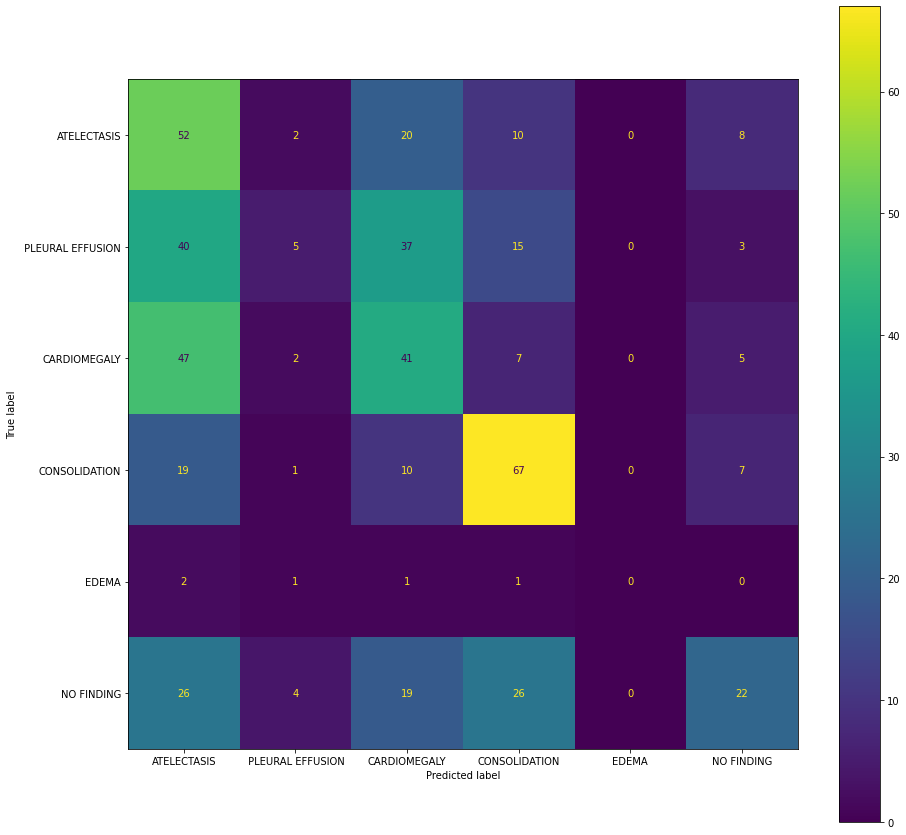

In [ ]:
my_predictions = my_model.predict(testing_images)
print(my_predictions.shape)

print(testing_labels)

cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=['ATELECTASIS', ' PLEURAL EFFUSION','CARDIOMEGALY','CONSOLIDATION','EDEMA','NO FINDING'])

fig, ax = plt.subplots(figsize=(15,15))
cmd.plot(ax=ax)

plt.show()

In [ ]:
my_base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(512,512,3),
    pooling='max')

x = Dense(32, activation='relu', name='Dense_1', dtype='float32')(my_base_model.output)
x = Dense(16, activation='relu', name='Dense_2', dtype='float32')(x)
x = Dense(8, activation='relu', name='Dense_3', dtype='float32')(x)
x = Dense(6, activation='softmax', name='Output', dtype='float32')(x)


my_model = Model(inputs=[my_base_model.input], outputs=[x])


my_optimiser = Adam(lr=0.00001)
my_model.compile(loss='categorical_crossentropy', optimizer=my_optimiser, metrics=['categorical_accuracy'])

print('Model compiled successfully...')

my_model.summary()

Model compiled successfully...
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv3_block2_1_conv (Conv2D)   (None, 64, 64, 128)  65664       ['conv3_block1_out[0][0]']       
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 64, 64, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 64, 64, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 64, 64, 128)  147584      ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

In [ ]:
file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')
epochs = 10
batch_size = 16

print('Training...')

my_model_history = my_model.fit(x=training_images, y=training_labels, epochs=epochs, callbacks=my_callbacks, validation_split = 0.1, batch_size=batch_size)


file.close()

Training...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
84/85 [============================>.] - ETA: 0s - loss: 1.4557 - categorical_accuracy: 0.3728
Epoch 1: val_categorical_accuracy did not improve from 0.98000
85/85 [==============================] - 9s 97ms/step - loss: 1.4546 - categorical_accuracy: 0.3719 - val_loss: 1.5026 - val_categorical_accuracy: 0.4933 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000989084726566536.
Epoch 2/10
84/85 [============================>.] - ETA: 0s - loss: 1.4504 - categorical_accuracy: 0.3646
Epoch 2: val_categorical_accuracy did not improve from 0.98000
85/85 [==============================] - 8s 92ms/step - loss: 1.4487 - categorical_accuracy: 0.3652 - val_loss: 0.6862 - val_categorical_accuracy: 0.9200 - lr: 9.8908e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009568159560924792.
Epoch 3/10
84/85 [============================>.] - ETA: 0s - loss: 1.4198 - categorical_

(500, 6)


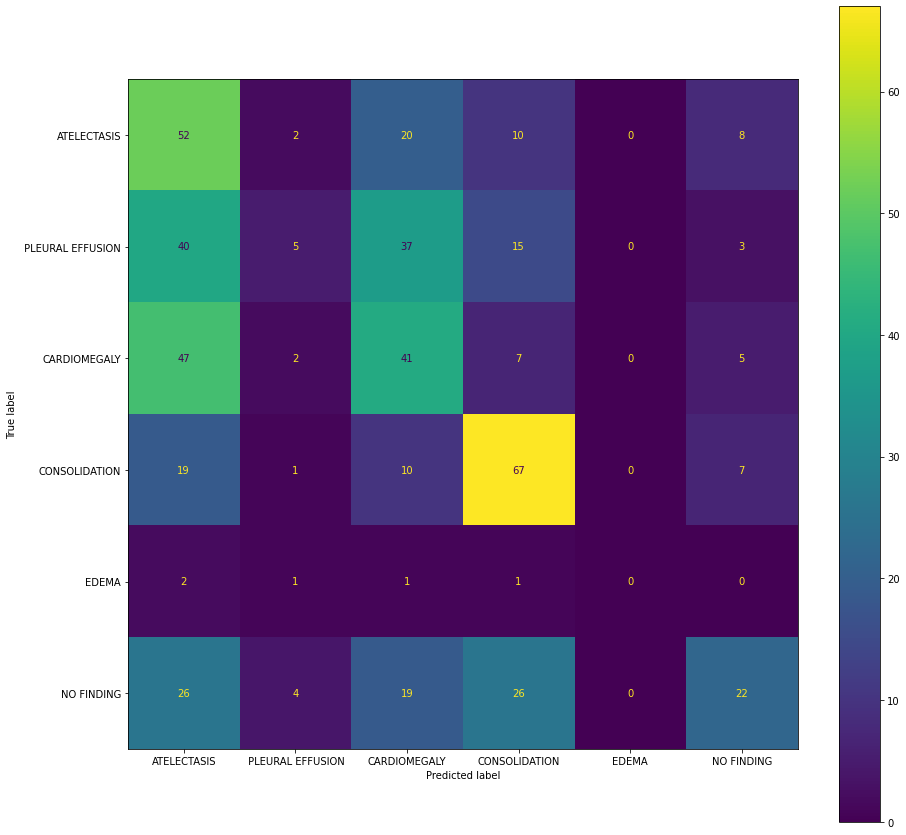

In [ ]:
my_predictions = my_model.predict(testing_images)
print(my_predictions.shape)


cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=['ATELECTASIS', ' PLEURAL EFFUSION','CARDIOMEGALY','CONSOLIDATION','EDEMA','NO FINDING'])

fig, ax = plt.subplots(figsize=(15,15))
cmd.plot(ax=ax)
plt.show()